# Fig. S2 MPSA Analysis for ELP1 exon 20


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm
import re
import sys
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

# My functions
sys.path.insert(0,'../')
import utils

# Useful variables
e = np.exp(1)
idx = pd.IndexSlice
_ = np.newaxis

# Load style file
plt.style.use('../fig.style')
%matplotlib inline

In [2]:
# Set known motifs ELP1
wt_motif   = 'AGGA/GUAAGU'
cons_motif = 'ACAG/GUAAGU'
null_motif = 'ACAG/GGAAGA'
ris_iupac_motif = 'ANGA/GUHDNN'
hyp_iupac_motif = 'NAGA/GUNNNN'

In [3]:
# Load motifs
motifs = pd.read_excel('../data/iupac_motifs.xlsx', index_col=0)['iupac']
motifs

name
wt           AGGA/GUAAGU
cons         NCAG/GUAAGU
neg          NCAG/GGAAGA
ris_iupac    ANGA/GUHDNN
hyp_iupac    NAGA/GUNNNN
ris_min      ANGA/GUADGN
hyp_min      RAGA/GURNGN
ris_max      ANGA/GUHDNN
hyp_max      NANN/GUNNNN
Name: iupac, dtype: object

In [4]:
# Load MPSA data
psi_df = pd.read_csv('../data/mpsa_data_elp1.csv', index_col=0)
psi_df.head()

,elp1_dmso,elp1_rg,elp1_nvs
ss,,,
AAAA/GCAAAA,0.0,0.025349,0.108121
AAAA/GCAAAG,0.0,0.000000,0.000000
AAAA/GCAAGA,0.0,0.000000,0.000000
AAAA/GCAAGG,0.0,0.004373,0.000000
AAAA/GCAAUC,0.0,0.000000,0.000000


In [5]:
# Set sequences
seqs = psi_df.index.values

# Set known motif indices and view quantities
wt_ix = utils.motif_to_ix(motifs['wt'], seqs)
cons_ix = utils.motif_to_ix(motifs['cons'], seqs) 
null_ix = utils.motif_to_ix(motifs['neg'], seqs)

In [6]:
# Define function to plot results
s = 20
bulkalpha=.5
si_figsize = [3.25,3.25]
figsize = [2,2]
N = len(seqs)
lims = [1E-4, 2E3]

# Shared ax style
def style_ax(ax, xlabel=None, ylabel=None):
    ticks = [3E-4, 1E-2, 1E0,  1E2]
    ticklabels = ['0', '$10^{-2}$', '$10^{0}$', '$10^{2}$']
    
    ax.axhline(100, linestyle='--', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.axvline(100, linestyle='--', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.plot(lims, lims, 'k:', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(ticklabels)
    ax.set_yticklabels(ticklabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_aspect('equal')
    ax.minorticks_off()
    ax.legend(loc='lower right', framealpha=1, fontsize=6)

Figure saved to figS2.pdf


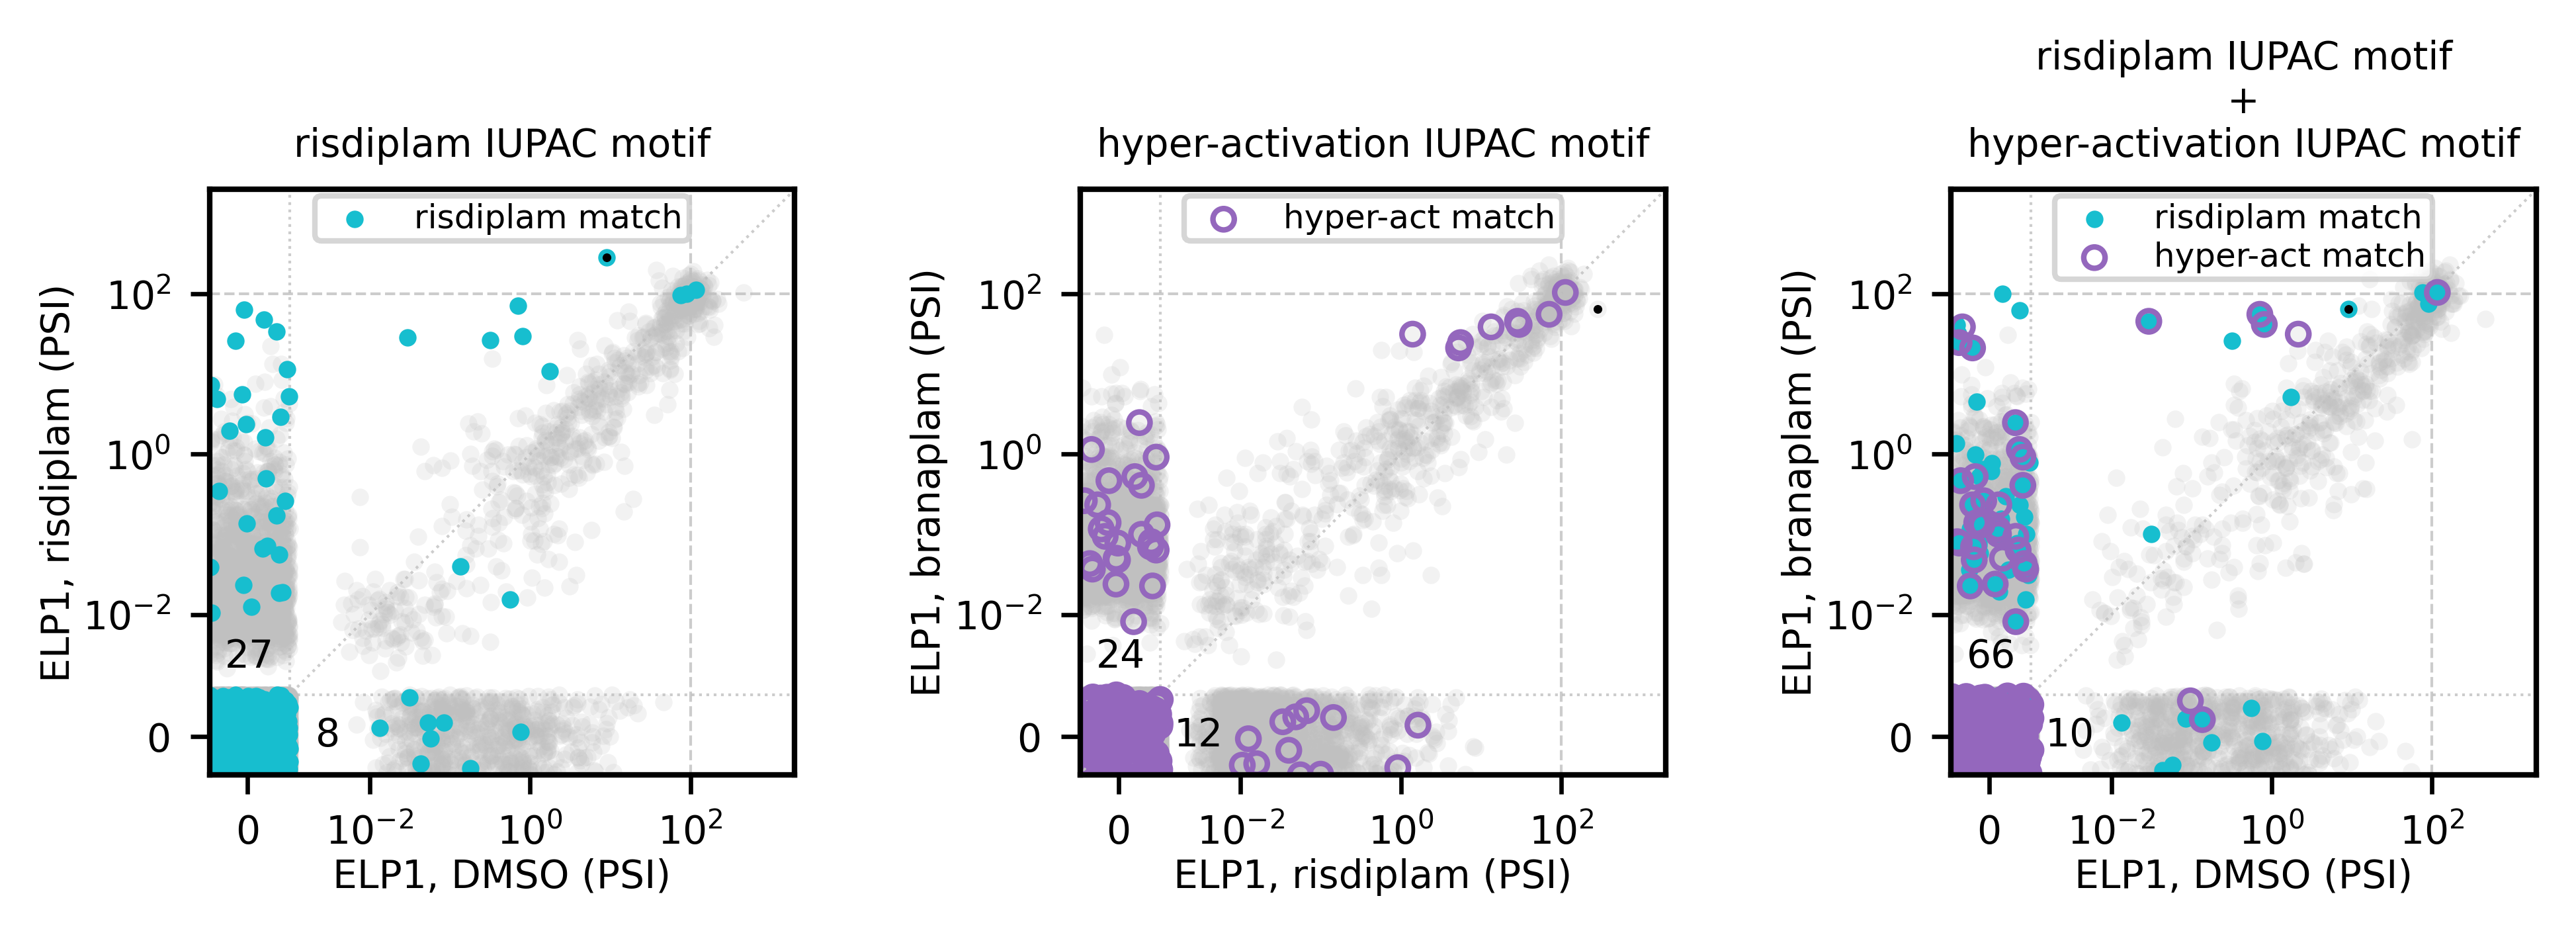

In [7]:
def draw(ax, xcol, ycol, xlabel, ylabel, 
         ris_motif, hyp_motif, ris_motif_color, hyp_motif_color, 
         title, loc = 'upper center',
         ris_motif_name=None, hyp_motif_name=None, legend=True):
    s=10
    bulkalpha=.2
    x = psi_df[xcol]
    y = psi_df[ycol]
    
    # Get indices
    seqs = psi_df.index.values
    wt_ix = utils.motif_to_ix(wt_motif, seqs)
    if ris_motif:
        ris_ix = utils.motif_to_ix(ris_motif, seqs)
    else:
        ris_ix = np.zeros(len(seqs))==1
        
    if hyp_motif:
        hyp_ix = utils.motif_to_ix(hyp_motif, seqs)
    else:
        hyp_ix = np.zeros(len(seqs))==1
    
    # Add lim
    zero_lo = lims[0]
    zero_hi = lims[0]*10
    zero_mid = np.sqrt(zero_hi * zero_lo)
    x = x + (x==0)*zero_lo*((zero_hi/zero_lo)**np.random.rand(len(x)))
    y = y + (y==0)*zero_lo*((zero_hi/zero_lo)**np.random.rand(len(y)))
    ax.scatter(x, y, alpha=bulkalpha, s=s, linewidth=0, color='silver', rasterized=True, zorder=-80)
    if ris_motif:
        ax.scatter(x[ris_ix], y[ris_ix], alpha=1, s=s, linewidth=0, 
               facecolor=ris_motif_color, label=ris_motif_name, rasterized=True, zorder=-70)
    if hyp_motif:
        ax.scatter(x[hyp_ix], y[hyp_ix], alpha=1, s=1.5*s, linewidth=1, edgecolor=hyp_motif_color, 
               facecolor='none', label=hyp_motif_name, rasterized=True, zorder=-50)
    ax.scatter(x[wt_ix], y[wt_ix], alpha=1, s=s/4, linewidth=0, color='k', rasterized=True)
    ax.axvline(zero_hi, linestyle=':', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.axhline(zero_hi, linestyle=':', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    style_ax(ax, xlabel=xlabel, ylabel=ylabel)
    if not legend:
        ax.get_legend().remove()
    else:
        ax.legend(fontsize=6, loc=loc)
    ax.set_title(title)
    
    hi_pos = zero_hi*3
    ix_vert = (y > zero_hi) & (x <= zero_hi) & (ris_ix | hyp_ix)
    ix_horiz = (x > zero_hi) & (y <= zero_hi) & (ris_ix | hyp_ix)
    ax.text(x=zero_mid, y=hi_pos, s=f'{sum(ix_vert)}', ha='center', va='center')
    ax.text(x=hi_pos, y=zero_mid, s=f'{sum(ix_horiz)}', ha='center', va='center')
    
#     if hyp_motif:
#         # Print 5'ss that seem out of place
#         ix = (x > zero_hi) & (y <= zero_hi) & hyp_ix
#         ix2 = (y > zero_hi) & (x <= zero_hi) & hyp_ix
#         print(f'{len(seqs[ix2])} mirror sequences')
#         print(f'{len(seqs[ix])} problematic sequences')
#         for seq in seqs[ix]:
#             print(seq)

# Make figure
fig = plt.figure(figsize=[6.5, 2.5])
gs = GridSpec(1, 3)

iupac_kwargs = dict(
     ris_motif_color='C9',
     hyp_motif_color='C4',
     ris_motif_name='risdiplam match',
     hyp_motif_name='hyper-act match',
)

# A
draw(ax=fig.add_subplot(gs[0,0]),
     title='risdiplam IUPAC motif',
     ris_motif=motifs['ris_iupac'],
     hyp_motif=None,
     xcol='elp1_dmso', 
     ycol='elp1_rg', 
     xlabel='ELP1, DMSO (PSI)',
     ylabel='ELP1, risdiplam (PSI)',
     **iupac_kwargs)

# B
draw(ax=fig.add_subplot(gs[0,1]),
     title='hyper-activation IUPAC motif',
     ris_motif=None,
     hyp_motif=motifs['hyp_iupac'],
     xcol='elp1_rg', 
     ycol='elp1_nvs', 
     xlabel='ELP1, risdiplam (PSI)',
     ylabel='ELP1, branaplam (PSI)',
     **iupac_kwargs)

# C
draw(ax=fig.add_subplot(gs[0,2]),
     title='risdiplam IUPAC motif\n+\nhyper-activation IUPAC motif',
     ris_motif=motifs['ris_iupac'],
     hyp_motif=motifs['hyp_iupac'],
     xcol='elp1_dmso', 
     ycol='elp1_nvs', 
     xlabel='ELP1, DMSO (PSI)',
     ylabel='ELP1, branaplam (PSI)',
     **iupac_kwargs)
        
# Save figure
plt.tight_layout(w_pad=3, h_pad=2)
fig_name = 'figS2.pdf'
fig.savefig(fig_name)
print(f'Figure saved to {fig_name}')